In [1]:
%matplotlib notebook

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import ROOT
from ROOT import TFile, TTree, TCanvas, TH2D
from scipy import constants
import pandas as pd
#plt.rcParams['text.usetex'] = True

from scipy.stats import binned_statistic_2d
import plotly.graph_objects as go

In [12]:
f = TFile("selectedEventsSim_050924_recoTest.root","READ")
t = f.Get("selectedEvents")

entries = t.GetEntries()
print(entries)

19188


In [22]:
muMom_list = []
piMom_list = []
lPMom_list = []

recoPiMom_list = []
recoMuMom_list = []
recoLPMom_list = []
weights_list = []


for e in range(entries):

    t.GetEntry(e)
    
    muMom_list.append(t.muonMom_)
    piMom_list.append(t.pionMom_)
    lPMom_list.append(t.lProtonMom_)
    
    recoMuMom_list.append(t.recoMomMu_)
    recoPiMom_list.append(t.recoMomPi_)
    recoLPMom_list.append(t.recoMomP_)
    
    weights_list.append(t.weight_)
    
muMom_arr = np.asarray(muMom_list)
piMom_arr = np.asarray(piMom_list)
lPMom_arr = np.asarray(lPMom_list)

recoMuMom_arr = np.asarray(recoMuMom_list)
recoPiMom_arr = np.asarray(recoPiMom_list)
recoLPMom_arr = np.asarray(recoLPMom_list)

weights_arr = np.asarray(weights_list)

print("recoMuMom_arr: ", recoMuMom_arr)
print("recoMuMom_arr.shape: ", recoMuMom_arr.shape)

recoMuMom_arr:  [ 0.99692154  0.3370114   0.17666699 ...  0.34830522 -1.
  0.84329624]
recoMuMom_arr.shape:  (19188,)


In [23]:
# POT scaling!

targetPOT = 1.3e21
sumPOT = 8.98e20

scale = targetPOT / sumPOT
print("Scale is: ", scale)

print(np.sum(weights_arr))
totalEvents = np.sum(weights_arr)*scale
print("totalEvents: ", totalEvents)

Scale is:  1.447661469933185
19218.55999585352
totalEvents:  27821.96881359641


<IPython.core.display.Javascript object>


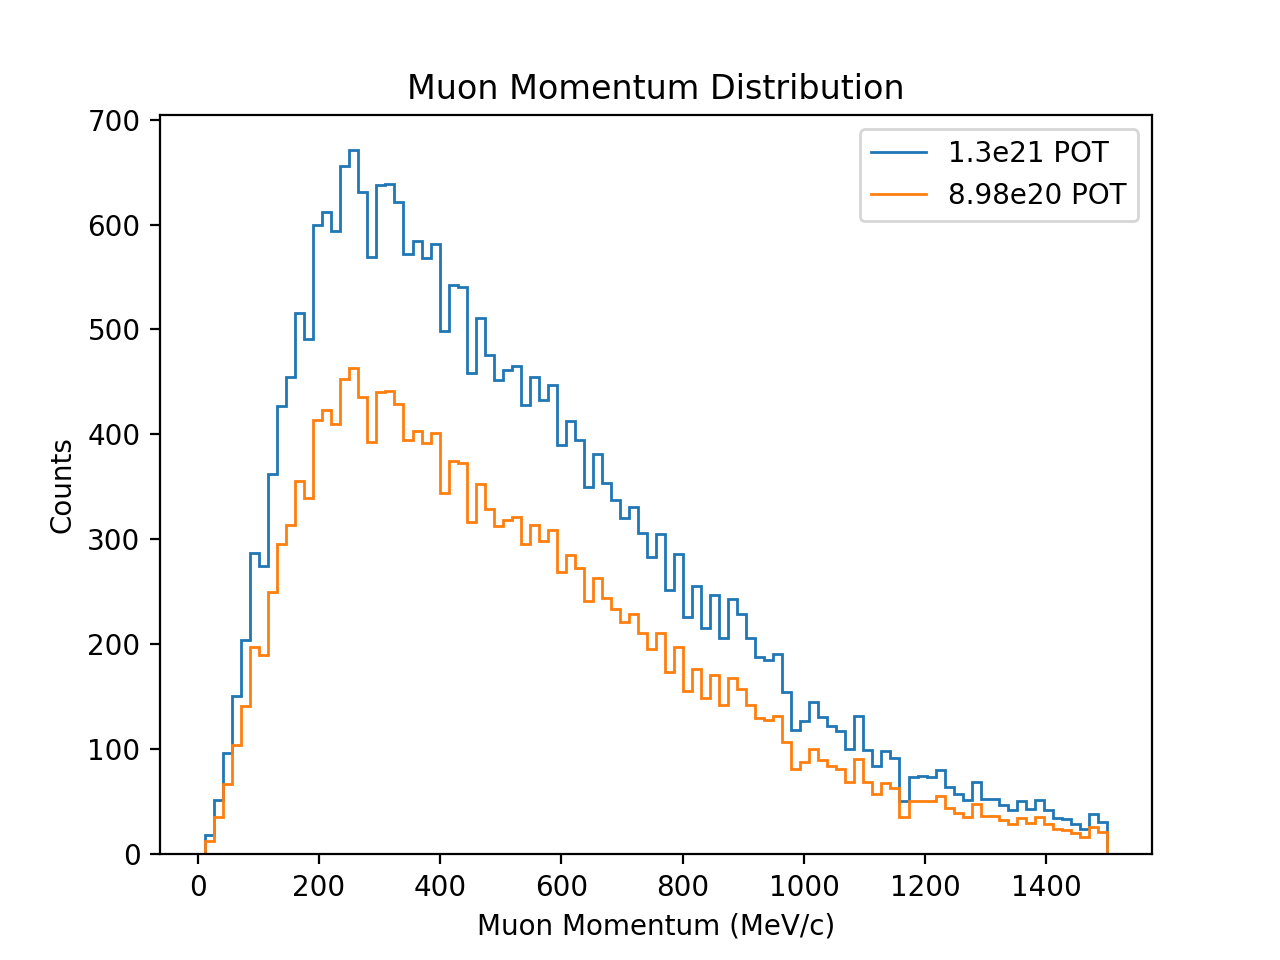

(19188,)


In [24]:
# truth muon momentum

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

print(muMom_arr.shape)

#counts, bins = np.histogram(delPTT_arr, bins=100)
counts, bins = np.histogram(muMom_arr, bins=100, weights=weights_arr)
scaledCounts = counts*scale
plt.stairs(scaledCounts, bins, label="1.3e21 POT")
plt.stairs(counts, bins, label="8.98e20 POT")
#plt.hist(ntuple_muonMom, bins=100, weights=ntuple_weights)
plt.xlabel('Muon Momentum (MeV/c)')
plt.ylabel('Counts')
plt.title('Muon Momentum Distribution')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

<IPython.core.display.Javascript object>


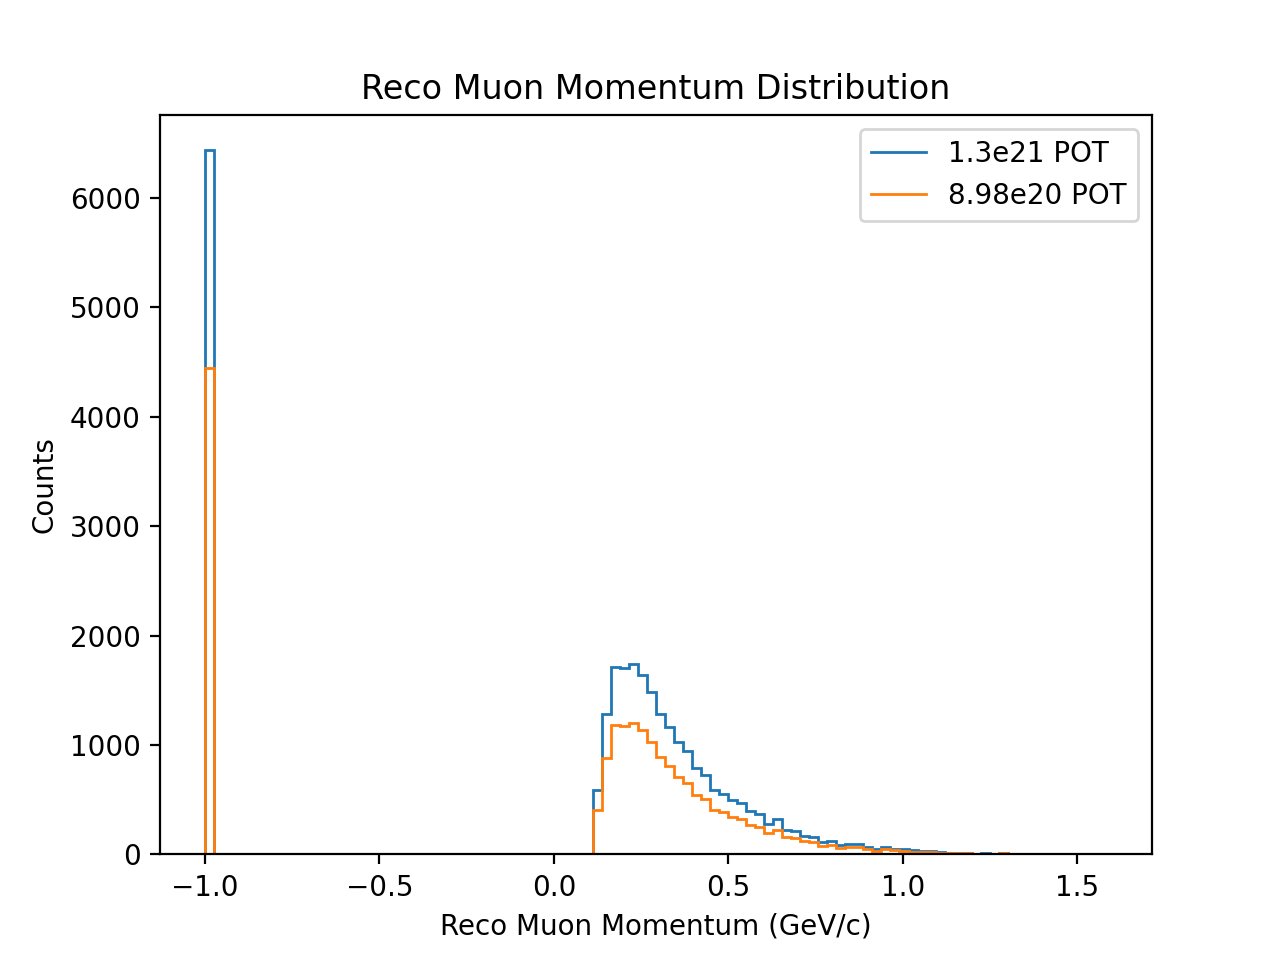

In [21]:
# reco muon momentum

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

counts, bins = np.histogram(recoMuMom_arr, bins=100, weights=weights_arr)
scaledCounts = counts*scale
plt.stairs(scaledCounts, bins, label="1.3e21 POT")
plt.stairs(counts, bins, label="8.98e20 POT")
#plt.hist(ntuple_muonMom, bins=100, weights=ntuple_weights)
plt.xlabel('Reco Muon Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('Reco Muon Momentum Distribution')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)